In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank (2).csv
Saving medical_students_dataset.csv to medical_students_dataset (1).csv
Saving Titanic-Dataset.csv to Titanic-Dataset.csv


Problem 1 - Data Read, Write and Inspect:

In [ ]:
import pandas as pd

# 1 Load the dataset
df = pd.read_csv("bank.csv")
print("First 5 rows of the dataset:")
print(df.head())


# 2️ Check info of the DataFrame
print("DataFrame Info:")
df.info()


# (a) Columns with dtype = object
object_cols = df.select_dtypes(include='object').columns
print("\n(a) Object Columns:")
print(object_cols)


# (b) Unique values of those columns
print("\n(b) Unique Values in Object Columns:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


# (c) Total number of null values in each column
print("\n(c) Null Values in Each Column:")
print(df.isnull().sum())


# 3 Drop object columns & save new CSV
df_numeric = df.drop(columns=object_cols)
df_numeric.to_csv("banknumericdata.csv", index=False)

print("\nNew Numeric DataFrame (without object columns):")
print(df_numeric.head())


# 4️⃣ Read banknumericdata.csv and show summary statistics
df2 = pd.read_csv("banknumericdata.csv")

print("\nSummary Statistics of banknumericdata.csv:")
print(df2.describe())


First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 en

Problem 2 - Data Imputations:

In [ ]:
import pandas as pd

# 1 Load the dataset
med = pd.read_csv("medical_students_dataset.csv")
print("First 5 rows of the dataset:")
print(med.head())


# 2 Check info + missing values
print("\n=== DataFrame Info ===")
med.info()

print("\nMissing values in each column:")
print(med.isnull().sum())


# 3 Fill missing values
for col in med.columns:
    if med[col].dtype != 'object' and med[col].isnull().sum() > 0:
        med[col] = med[col].fillna(med[col].mean())
        print(f"\nFilled missing values in numeric column '{col}' using MEAN")

for col in med.columns:
    if med[col].dtype == 'object' and med[col].isnull().sum() > 0:
        med[col] = med[col].fillna(med[col].mode()[0])
        print(f"\nFilled missing values in categorical column '{col}' using MODE")

print("\nMissing values AFTER filling:")
print(med.isnull().sum())


# 4️ Check and remove duplicates

duplicates = med.duplicated().sum()
print(f"\nTotal duplicate rows found: {duplicates}")

if duplicates > 0:
    med = med.drop_duplicates()
    print("Duplicate rows have been removed.")
else:
    print("No duplicates found.")

print("TASK 2 COMPLETED ")


First 5 rows of the dataset:
   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  

=== DataFrame Info ===
<class 'pandas.core.frame.DataFrame'>
Ra

Data Cleaning and Transformations with ”Titanic Dataset”:

First 5 rows of Titanic dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            37

/tmp/ipython-input-3498620944.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette="pastel")


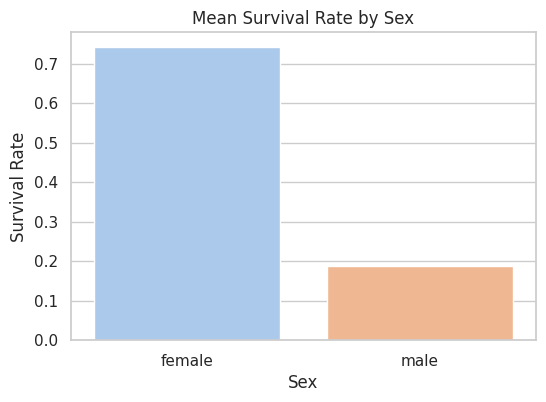


Problem 5: Survival distribution by Sex and Embarked dummies:
        Embarked_C  Embarked_Q  Embarked_S
Sex                                       
female          73          36         203
male            95          41         441


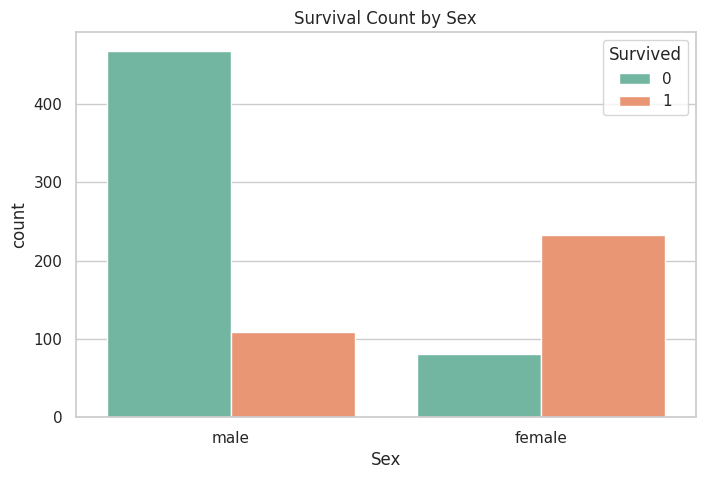

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1️ Load Titanic dataset
titanic = pd.read_csv("Titanic-Dataset.csv")
print("First 5 rows of Titanic dataset:")
print(titanic.head())
print("\nDataset shape:", titanic.shape)

# Problem 1: Subset columns and filter first-class passengers
cols = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']
titanic_subset = titanic[cols]

first_class = titanic_subset[titanic_subset['Pclass'] == 1]

fare_stats = {
    "Mean": first_class['Fare'].mean(),
    "Median": first_class['Fare'].median(),
    "Maximum": first_class['Fare'].max(),
    "Minimum": first_class['Fare'].min()
}

print("\nProblem 1: Fare Statistics for First-Class Passengers:")
for k, v in fare_stats.items():
    print(f"{k}: {v}")

# Problem 2: Null values in 'Age' and drop them
null_age = first_class['Age'].isnull().sum()
print(f"\nProblem 2: Number of null values in 'Age': {null_age}")

first_class_clean = first_class.dropna(subset=['Age'])
print(f"Shape after dropping null 'Age': {first_class_clean.shape}")

# Problem 3: One-hot encode 'Embarked' column
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic_full = pd.concat([titanic, embarked_dummies], axis=1)
titanic_full.drop(columns=['Embarked'], inplace=True)

print("\nProblem 3: First 5 rows after one-hot encoding 'Embarked':")
print(titanic_full.head())

# Problem 4: Compare mean survival rates by Sex
survival_by_sex = titanic_full.groupby('Sex')['Survived'].mean()
print("\nProblem 4: Mean Survival Rate by Sex:")
print(survival_by_sex)

plt.figure(figsize=(6,4))
sns.barplot(x=survival_by_sex.index, y=survival_by_sex.values, palette="pastel")
plt.title("Mean Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

# Problem 5: Survival by Sex and Port of Embarkation
survival_embarked = titanic_full.groupby('Sex')[['Embarked_C','Embarked_Q','Embarked_S']].sum()
print("\nProblem 5: Survival distribution by Sex and Embarked dummies:")
print(survival_embarked)

plt.figure(figsize=(8,5))
sns.countplot(data=titanic_full, x='Sex', hue='Survived', palette="Set2")
plt.title("Survival Count by Sex")
plt.show()

